In [792]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import datetime as dt
from datetime import date



In [793]:
URL = "data/TSLA.csv"

In [794]:
df = pd.read_csv(URL, sep=",")

df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-24,205.820007,213.500000,198.589996,211.250000,211.250000,100446800
1,2022-10-25,210.100006,224.350006,210.000000,222.419998,222.419998,96507900
2,2022-10-26,219.399994,230.600006,218.199997,224.639999,224.639999,85012500
3,2022-10-27,229.770004,233.809998,222.850006,225.089996,225.089996,61638800
4,2022-10-28,225.399994,228.860001,216.350006,228.520004,228.520004,69152400


In [795]:

df['Date'] = pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(dt.datetime.toordinal)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    int64  
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 13.8 KB


,Date,Open,High,Low,Close,Adj Close,Volume
0,738452,205.820007,213.500000,198.589996,211.250000,211.250000,100446800
1,738453,210.100006,224.350006,210.000000,222.419998,222.419998,96507900
2,738454,219.399994,230.600006,218.199997,224.639999,224.639999,85012500
3,738455,229.770004,233.809998,222.850006,225.089996,225.089996,61638800
4,738456,225.399994,228.860001,216.350006,228.520004,228.520004,69152400


<Axes: xlabel='Date', ylabel='Close'>

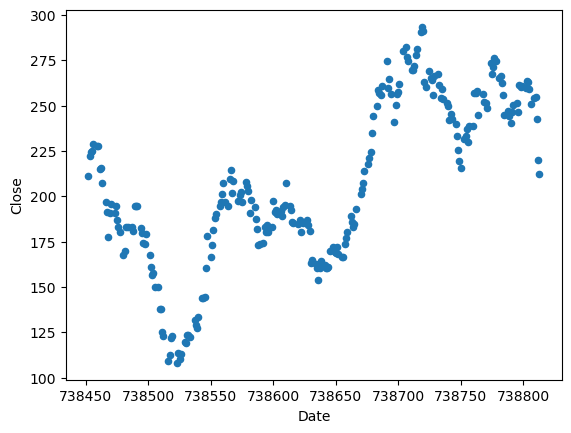

In [796]:
df.plot.scatter(x = 'Date', y='Close')

In [797]:
x = df.values
df = pd.DataFrame(x)

In [798]:
X = pd.DataFrame(df[0]) #Date
y = pd.DataFrame(df[4]) #Close value

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [799]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
Y_pred = linear_regressor.predict(X_train)

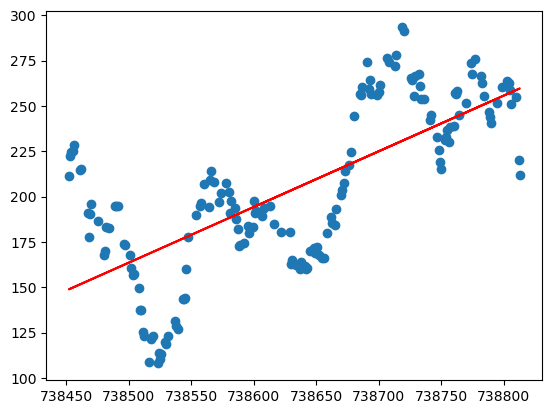

MSE = 1057.8723850688948


In [800]:
plt.scatter(X_train, y_train)           #plot blue dots with real data
plt.plot(X_train, Y_pred, color='red')  #plot red lines with prediction
plt.show()                              #show the plot
print( "MSE = "+str(metrics.mean_squared_error(y_train,Y_pred))) #Calculate MSE

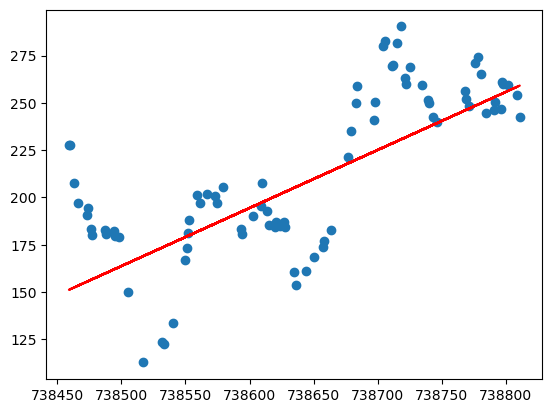

MSE = 896.3148478170289


In [801]:
Y_pred = linear_regressor.predict(X_test) #predict the model on X_test
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_test, Y_pred)))

In [802]:
d0 = date(2023, 10, 20)
d1 = date(int(input("Year")), int(input("Month")), int(input("Day")))
days_from_today = d1-d0
ordinal_date = int(d0.toordinal()) + int(days_from_today.days)
output = linear_regressor.predict([[ordinal_date]])

print("The estimated stock price for " + str(d1.day) + "-" + str(d1.month) + "-" + str(d1.year) + " based on this linear regression algorithm is " + str(output[0][0]))

The estimated stock price for 1-12-2024 based on this linear regression algorithm is 384.9206859404512


In [803]:
score_lin = metrics.r2_score(y_test, Y_pred)
print("The accuracy of our model is {}%".format(round(score_lin, 2) *100))


The accuracy of our model is 50.0%


In [804]:
X = pd.DataFrame(df[0]) # Date
y = pd.DataFrame(df[4]) # Close

#Now, split the set in training and testing set
#test_size = 0.33 tell the function that 1/3 of values should be put in test arrat
#Random state is a variable that seeds the random generator. In that way
#you'll get the same training and testing set each run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [805]:
#The X values are large and close together, this causees a problem for polyfit. 
#To fix this we subtract the mean from the X values, hence they are centered around 0. 

#mu = int(X_train.mean().iloc[0])
X_train = X_train - np.min(X_train)
X_test = X_test - np.min(X_test)

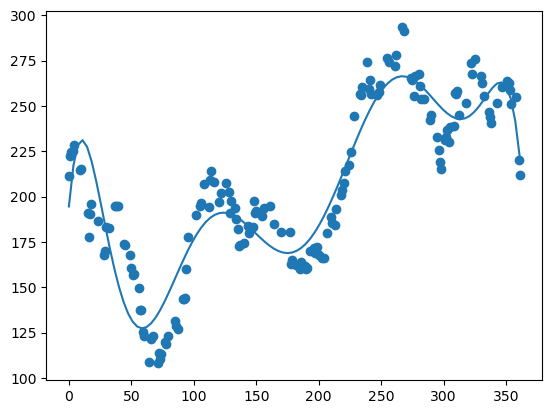

MSE = 310.0738891602125


In [806]:
mymodel = np.poly1d(np.polyfit(X_train.values.ravel(), y_train.values.ravel(), 8))

myline = np.linspace(np.min(X_train), np.max(X_train), 100)

plt.scatter(X_train, y_train)
plt.plot(myline, mymodel(myline))
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_test, mymodel(X_test))))


In [807]:
score_poly = metrics.r2_score(y_test, mymodel(X_test))
print("The accuracy of our model is {}%".format(round(score_poly, 2) *100))

The accuracy of our model is 83.0%


In [808]:
stock_price = mymodel(days_from_today.days+len(df))
print("The estimated stock price for " + str(d1.day) + "-" + str(d1.month) + "-" + str(d1.year) + " based on this polynomial regression algorithm is " + str(stock_price))

The estimated stock price for 1-12-2024 based on this polynomial regression algorithm is -4868594.037976279
